In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path('Resources/lending_data.csv')
lending_data_df = pd.read_csv(file_path)
lending_data_df.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df['loan_status']

# Separate the X variable, the features
X = lending_data_df.drop(columns=['loan_status'])

In [5]:
# Review the y variable Series
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64


In [6]:
# Review the X variable DataFrame

X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
y_pred = logistic_regression_model.predict(X_test)

# Print the predictions
print(y_pred)
print(len(y_pred))

[0 0 0 ... 0 0 0]
15508


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)


In [11]:
# Print the classification report for the model
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14926    75]
 [   46   461]]


In [12]:
print (classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14972
           1       0.91      0.86      0.88       536

    accuracy                           0.99     15508
   macro avg       0.95      0.93      0.94     15508
weighted avg       0.99      0.99      0.99     15508



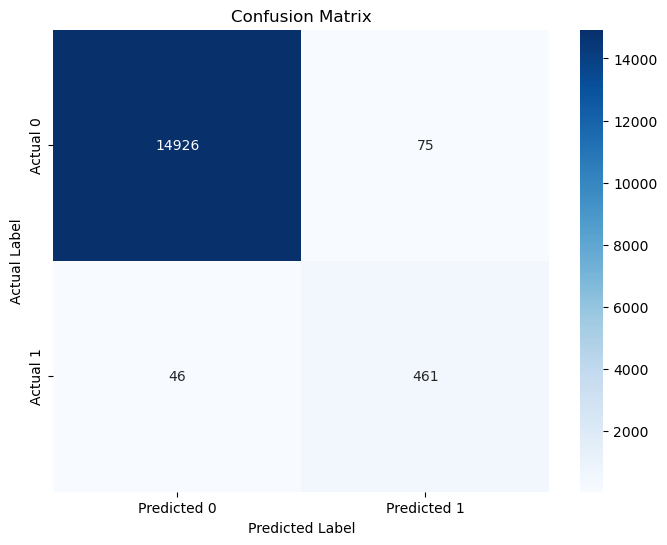

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
The model performs exceptionally well in predicting healthy loans (class 0) with very high precision, recall, and F1 score.

The model also performs well in predicting high-risk loans (class 1), though the precision and recall are slightly lower compared to class 0.

This indicates that the logistic regression model is highly effective at distinguishing between healthy and high-risk loans, making it a reliable tool for predicting loan outcomes.

---